# Documentation

https://scikit-learn.org/stable/modules/linear_model.html

In [2]:
import numpy
import random
import matplotlib
%matplotlib inline

In [3]:
random.seed(42)
numpy.random.seed(42)

# Manual Dataset prep

In [4]:
ages = []
for i in range(100):
    ages.append(random.randint(20,65))
net_worth = [val*6.25+numpy.random.normal(scale = 40.) for val in ages]

print(ages[:10])
print(net_worth[:10])

[60, 27, 21, 37, 35, 34, 28, 26, 63, 54]
[394.8685661204493, 163.2194279531526, 157.1575415240277, 292.17119425632103, 209.38386501106658, 203.1345217220328, 238.16851262029564, 193.19738916611635, 374.97102456260194, 359.2024017434386]


In [5]:
X = numpy.reshape(numpy.array(ages), (len(ages),1))
y = numpy.reshape(numpy.array(net_worth), (len(net_worth),1))
print(X[0:10])
print(y[0:10])

[[60]
 [27]
 [21]
 [37]
 [35]
 [34]
 [28]
 [26]
 [63]
 [54]]
[[394.86856612]
 [163.21942795]
 [157.15754152]
 [292.17119426]
 [209.38386501]
 [203.13452172]
 [238.16851262]
 [193.19738917]
 [374.97102456]
 [359.20240174]]


# Model data split

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [7]:
print("X_train",X_train.shape,X_train[:10])
print("X_test",X_test.shape,X_test[:10])


X_train (75, 1) [[22]
 [63]
 [25]
 [54]
 [48]
 [32]
 [55]
 [61]
 [46]
 [62]]
X_test (25, 1) [[57]
 [38]
 [22]
 [26]
 [26]
 [21]
 [60]
 [37]
 [36]
 [21]]


# Model build

In [8]:
def build(feature, truth):
    from sklearn.linear_model import LinearRegression
    reg = LinearRegression()
    reg.fit(feature, truth)
    return reg

In [9]:
model = build(X_train, y_train)
print("Slope : ",model.coef_)
print("Intercept : ",model.intercept_)

Slope :  [[6.30945055]]
Intercept :  [-7.44716216]


# Data visualization

In [10]:
import matplotlib.pyplot as plt

In [11]:
line = model.coef_[0][0]*X_train + model.intercept_

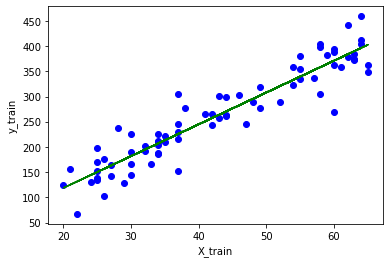

In [12]:
plt.scatter(X_train,y_train,c='b',marker='o')
plt.xlabel('X_train')
plt.ylabel('y_train')
plt.plot(X_train,line,c='g')

In [13]:
line1 = model.coef_[0][0]*X_test + model.intercept_

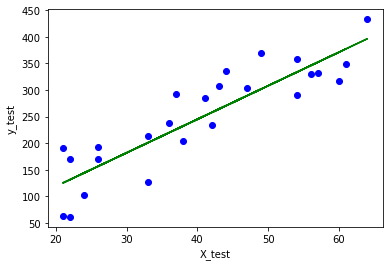

In [14]:
plt.scatter(X_test,y_test,c='b',marker='o')
plt.xlabel('X_test')
plt.ylabel('y_test')
plt.plot(X_test,line1,c='g')

In [18]:
print("Training r-squared error",model.score(X_train,y_train))
print("Test r-squared error",model.score(X_test,y_test))

Training r-squared error 0.877314608488221
Test r-squared error 0.7889037259170788
